<a href="https://colab.research.google.com/github/alirezash97/BraTS/blob/master/BraTS2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# !wget 'https://www.cbica.upenn.edu/MICCAI_BraTS2020_TrainingData'

In [ ]:
# !unzip /content/MICCAI_BraTS2020_TrainingData -d '/content/drive/My Drive/BRATS2020/'

In [ ]:
# !cp -r '/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/' /content/MICCAI_BraTS2020_TrainingData/

In [9]:
# %tensorflow_version 2.x
import tensorflow as tf
# print("Tensorflow version " + tf.__version__)

# try:
#   tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
#   print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
# except ValueError:
#   raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [10]:
import os


# tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
# print ('TPU address is', tpu_address)


In [11]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import cv2
import keras 
import random


In [12]:


import glob, os
images_path = glob.glob('/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/**/*.nii.gz', recursive=True)

In [13]:
X_trainset_filenames = []
y_trainset_filenames = []

for item in images_path:
  if 'seg' in item:
    y_trainset_filenames.append(os.path.join(data_path, item))
  else:
    X_trainset_filenames.append(os.path.join(data_path, item))




In [ ]:
print(len(X_trainset_filenames))
print(len(y_trainset_filenames))

1476
369


In [ ]:
for i in range(8):
  print(X_trainset_filenames[i:i+1])
  print()

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/BraTS20_Training_355_t1.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/BraTS20_Training_355_flair.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/BraTS20_Training_355_t2.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/BraTS20_Training_355_t1ce.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_365/BraTS20_Training_365_t1ce.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_365/BraTS20_Training_365_t1.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_365/BraTS20_Training_365_t2.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_365/BraTS20_Training_365_flair.nii.gz']



In [ ]:
for i in range(2):
  print(y_trainset_filenames[i:i+1])
  print()

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_355/BraTS20_Training_355_seg.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_365/BraTS20_Training_365_seg.nii.gz']



In [14]:
def shuffle(sample_path, target_path):

  a_list = list(range(0, len(target_path)))
  random.shuffle(a_list)

  new_sample_path = []
  new_target_path = []
  for i in a_list:
    for j in range(4):
      new_sample_path.append(sample_path[(i*4)+j])
    new_target_path.append(target_path[i])

  return new_sample_path, new_target_path




In [15]:
X_trainset_filenames, y_trainset_filenames = shuffle(X_trainset_filenames, y_trainset_filenames)

In [ ]:
for i in range(8):
  print(X_trainset_filenames[i:i+1])
  print()

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_369/BraTS20_Training_369_t1.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_369/BraTS20_Training_369_t2.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_369/BraTS20_Training_369_flair.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_369/BraTS20_Training_369_t1ce.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_105/BraTS20_Training_105_t1.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_105/BraTS20_Training_105_t2.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_105/BraTS20_Training_105_flair.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_105/BraTS20_Training_105_t1ce.nii.gz']



In [ ]:
for i in range(2):
  print(y_trainset_filenames[i:i+1])
  print()

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_369/BraTS20_Training_369_seg.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_105/BraTS20_Training_105_seg.nii.gz']



In [16]:
def sort_by_channel(sample_path):

  n = int(len(sample_path) / 4)
  new_path = []
  for i in range(n):
    temp = sample_path[(i*4): (i+1)*4]
    new_temp = []

    ###############
    for path in temp:
      if '_t1.' in path:
        new_temp.append(path)
      else:
        pass
    for path in temp:
      if '_t1ce.' in path:
        new_temp.append(path)
      else:
        pass
    for path in temp:
      if '_t2.' in path:
        new_temp.append(path)
      else:
        pass
    for path in temp:
      if '_flair.' in path:
        new_temp.append(path)
      else:
        pass

    ################    
    for path in new_temp:
      new_path.append(path)


  return new_path



In [17]:
X_trainset_filenames = sort_by_channel(X_trainset_filenames)

In [ ]:
for i in range(88, 96):
  print(X_trainset_filenames[i:i+1])
  print()

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_294/BraTS20_Training_294_t1.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_294/BraTS20_Training_294_t1ce.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_294/BraTS20_Training_294_t2.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_294/BraTS20_Training_294_flair.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_291/BraTS20_Training_291_t1.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_291/BraTS20_Training_291_t1ce.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_291/BraTS20_Training_291_t2.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_291/BraTS20_Training_291_flair.nii.gz']



In [ ]:
for i in range(22, 24):
  print(y_trainset_filenames[i:i+1])
  print()

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_294/BraTS20_Training_294_seg.nii.gz']

['/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_291/BraTS20_Training_291_seg.nii.gz']



In [18]:
def get_labeled_image(image, label, is_categorical=False):
    if not is_categorical:



        ############## voxel categories were 0, 1, 2, 4 

        for i in range(240):
          for j in range(240):
            for k in range(155):
              if label[i, j, k] == 4.0 :
                label[i, j, k] = 3.0
              else:
                pass


        ########## voxel categpries are 0, 1, 2, 3 for better categorization 


        label = to_categorical(label, num_classes=4).astype(np.uint8)

    image = cv2.normalize(image[:, :, :, 0], None, alpha=0, beta=255,
                          norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F).astype(
        np.uint8)

    labeled_image = np.zeros_like(label[:, :, :, 1:])

    # remove tumor part from image
    labeled_image[:, :, :, 0] = image * (label[:, :, :, 0])
    labeled_image[:, :, :, 1] = image * (label[:, :, :, 0])
    labeled_image[:, :, :, 2] = image * (label[:, :, :, 0])

    # color labels
    labeled_image += label[:, :, :, 1:] * 255
    return labeled_image

In [19]:
def plot_image_grid(image, unlabeled_image):



    ############################################################################
    data_all = []

    data_all.append(image)

    fig, ax = plt.subplots(3, 6, figsize=[16, 9])

    # coronal plane
    coronal = np.transpose(data_all, [1, 3, 2, 4, 0])
    coronal = np.rot90(coronal, 1)

    # transversal plane
    transversal = np.transpose(data_all, [2, 1, 3, 4, 0])
    transversal = np.rot90(transversal, 2)

    # sagittal plane
    sagittal = np.transpose(data_all, [2, 3, 1, 4, 0])
    sagittal = np.rot90(sagittal, 1)

    n_coronal = []
    for i in range(6):
        n = np.random.randint(coronal.shape[2])
        n_coronal.append(n)

        ax[0][i].imshow(np.squeeze(coronal[:, :, n, :]))
        ax[0][i].set_xticks([])
        ax[0][i].set_yticks([])
        if i == 0:
            ax[0][i].set_ylabel('Coronal', fontsize=15)

    n_transversal = []
    for i in range(6):
        n = np.random.randint(transversal.shape[2])
        n_transversal.append(n)

        ax[1][i].imshow(np.squeeze(transversal[:, :, n, :]))
        ax[1][i].set_xticks([])
        ax[1][i].set_yticks([])
        if i == 0:
            ax[1][i].set_ylabel('Transversal', fontsize=15)

    n_sagittal = []    
    for i in range(6):
        n = np.random.randint(sagittal.shape[2])
        n_sagittal.append(n)

        ax[2][i].imshow(np.squeeze(sagittal[:, :, n, :]))
        ax[2][i].set_yticks([])
        if i == 0:
            ax[2][i].set_ylabel('Sagittal', fontsize=15)

    fig.suptitle('\n\n#########################\n #### labeled MRI ####\n ##############################', fontsize=16, color='white')
    fig.subplots_adjust(wspace=0, hspace=0)

    ############################################################################

    data_all = []

    data_all.append(unlabeled_image)

    fig, ax = plt.subplots(3, 6, figsize=[16, 9])

    # coronal plane
    coronal = np.transpose(data_all, [1, 3, 2, 4, 0])
    coronal = np.rot90(coronal, 1)

    # transversal plane
    transversal = np.transpose(data_all, [2, 1, 3, 4, 0])
    transversal = np.rot90(transversal, 2)

    # sagittal plane
    sagittal = np.transpose(data_all, [2, 3, 1, 4, 0])
    sagittal = np.rot90(sagittal, 1)

    for i in range(6):
        ax[0][i].imshow(np.squeeze(coronal[:, :, n_coronal[i], 1]), cmap='gray')
        ax[0][i].set_xticks([])
        ax[0][i].set_yticks([])
        if i == 0:
            ax[0][i].set_ylabel('Coronal', fontsize=15)

    for i in range(6):
        ax[1][i].imshow(np.squeeze(transversal[:, :, n_transversal[i], 1]), cmap='gray')
        ax[1][i].set_xticks([])
        ax[1][i].set_yticks([])
        if i == 0:
            ax[1][i].set_ylabel('Transversal', fontsize=15)

    for i in range(6):
        ax[2][i].imshow(np.squeeze(sagittal[:, :, n_sagittal[i], 1]), cmap='gray')
        ax[2][i].set_yticks([])
        if i == 0:
            ax[2][i].set_ylabel('Sagittal', fontsize=15)

    fig.suptitle('\n\n#########################\n #### unlabeled MRI ####\n ##############################', fontsize=16, color='white')
    fig.subplots_adjust(wspace=0, hspace=0)



In [20]:
def load_case(image_nifty_file, label_nifty_file):
    
    # load the image and label file, get the image content and return a numpy array for each
    image = np.zeros((240, 240, 155, 4))

    img0 = np.array(nib.load(image_nifty_file[0]).get_fdata())
    img1 = np.array(nib.load(image_nifty_file[1]).get_fdata())
    img2 = np.array(nib.load(image_nifty_file[2]).get_fdata())
    img3 = np.array(nib.load(image_nifty_file[3]).get_fdata())
    
    image[:, :, :, 0] = img0
    image[:, :, :, 1] = img1
    image[:, :, :, 2] = img2
    image[:, :, :, 3] = img3
      
    label = np.array(nib.load(label_nifty_file).get_fdata())
    
    
    return image, label

In [ ]:
# image_unlabeled , label = load_case(X_trainset_filenames[:4], y_trainset_filenames[0])
# image = get_labeled_image(image_unlabeled, label)

# plot_image_grid(image, image_unlabeled)

In [21]:
import imageio
from IPython.display import Image

def visualize_data_gif(data_):
    images = []
    for i in range(data_.shape[0]):
        x = data_[min(i, data_.shape[0] - 1), :, :]
        y = data_[:, min(i, data_.shape[1] - 1), :]
        z = data_[:, :, min(i, data_.shape[2] - 1)]
        img = np.concatenate((x, y, z), axis=1)
        images.append(img)
    imageio.mimsave("/tmp/gif.gif", images, duration=0.01)
    return Image(filename="/tmp/gif.gif", format='png')

In [ ]:
# ## combine t1, t1c, t2 and flair for patient 337 = X_trainset_filenames[4:8]
# ## label for patient 337 = y_trainset_filenames[1]

# image, label = load_case(X_trainset_filenames[4:8], y_trainset_filenames[1])
# visualize_data_gif(get_labeled_image(image, label))

In [67]:
def get_sub_volume(image, label, 
                   orig_x = 240, orig_y = 240, orig_z = 155, 
                   output_x = 120, output_y = 120, output_z = 16,
                   num_classes = 4, max_tries = 1000, 
                   background_threshold=0.95):
  

    ############## voxel categories were 0, 1, 2, 4 

    for i in range(240):
      for j in range(240):
        for k in range(155):
          if label[i, j, k] == 4.0 :
            label[i, j, k] = 3.0
          else:
            pass


    ########## voxel categpries are 0, 1, 2, 3 for better categorization 

    
    # Initialize features and labels with `None`

    
    tries = 0
    
    while tries < max_tries:
        # randomly sample sub-volume by sampling the corner voxel
        # hint: make sure to leave enough room for the output dimensions!
        start_x = np.random.randint(0, (orig_x - output_x + 1))
        start_y = np.random.randint(0, (orig_y - output_y + 1))
        start_z = np.random.randint(0, (orig_z - output_z + 1))

        # extract relevant area of label
        y = label[start_x: start_x + output_x,
                  start_y: start_y + output_y,
                  start_z: start_z + output_z]
        
        # One-hot encode the categories.
        # This adds a 4th dimension, 'num_classes'
        # (output_x, output_y, output_z, num_classes)
        y = keras.utils.to_categorical(y, num_classes=num_classes)

        # compute the background ratio
        bgrd_ratio = np.sum(y[:, :, :, 0]) / (output_x * output_y * output_z)

        # increment tries counter
        tries += 1

        # if background ratio is below the desired threshold,
        # use that sub-volume.
        # otherwise continue the loop and try another random sub-volume
        if bgrd_ratio < background_threshold:

            # make copy of the sub-volume
            X = np.copy(image[start_x: start_x + output_x,
                              start_y: start_y + output_y,
                              start_z: start_z + output_z, :])
            

            random1 = np.random.uniform(0, 1)
            random2 = np.random.uniform(0, 1)


            # change dimension of X
            # from (x_dim, y_dim, z_dim, num_channels)
            # to (num_channels, x_dim, y_dim, z_dim)

            
            X = np.moveaxis(X, 3, 0)


            if random1 > 0.5:

              #########    data augmentation    ##############################

              if random2 > 0.66:
                #### 90 degree rotation #####
                X = np.moveaxis(X, 1, 2)
                #############################
              
              elif 0.33 < random2 <= 0.66:
                #### 180 degree rotation ####
                X = np.flip(X, (1, 2))
                #############################
              else :
                #### 270 degree rotation #####
                X = np.moveaxis(X, 1, 2)
                X = np.flip(X, (1, 2))
                ##############################

              ###############################################################


            else :
              pass

              




            # change dimension of y
            # from (x_dim, y_dim, z_dim, num_classes)
            # to (num_classes, x_dim, y_dim, z_dim)
            y = np.moveaxis(y, 3, 0)


            if random1 > 0.5:


              #########    data augmentation    #############################

              if random2 > 0.66:
                #### 90 degree rotation #####
                y = np.moveaxis(y, 1, 2)
                #############################

              elif 0.33 < random2 <= 0.66:
                #### 180 degree rotation ####
                y = np.flip(y, (1, 2))
                #############################

              else :
                #### 270 degree rotation #####
                y = np.moveaxis(y, 1, 2)
                y = np.flip(y, (1, 2))
                ##############################

              ###############################################################

            else :
              pass
              
              



            
            # take a subset of y that excludes the background class
            # in the 'num_classes' dimension
            y = y[1:, :, :, :]
    
            return X, y

In [24]:
def visualize_patch(X, y):
    fig, ax = plt.subplots(1, 2, figsize=[10, 5], squeeze=False)

    ax[0][0].imshow(X[:, :, 0], cmap='Greys_r')
    ax[0][0].set_yticks([])
    ax[0][0].set_xticks([])
    ax[0][1].imshow(y[:, :, 0], cmap='Greys_r')
    ax[0][1].set_xticks([])
    ax[0][1].set_yticks([])

    fig.subplots_adjust(wspace=0, hspace=0)

(4, 120, 120, 16)
(3, 120, 120, 16)


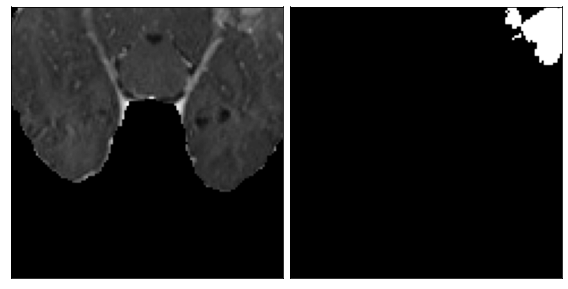

In [66]:
image, label = load_case(X_trainset_filenames[4:8], y_trainset_filenames[1])
X, y = get_sub_volume(image, label)

#############
print(X.shape)
print(y.shape)
#############

# non-enhancing tumor is channel 1 in the class label
visualize_patch(X[1, :, :, :], y[1])

In [ ]:
# visualize_patch(X[1, :, :, :], y[2])

In [ ]:
# visualize_patch(X[1, :, :, :], y[0])

In [ ]:
def standardize(image):

    one = 1
    # initialize to array of zeros, with same shape as the image
    standardized_image = np.zeros((image.shape[0], image.shape[1], image.shape[2], image.shape[3]))

    # iterate over channels
    for c in range(image.shape[0]):
        # iterate over the `z` dimension
        for z in range(image.shape[3]):
            # get a slice of the image 
            # at channel c and z-th dimension `z`
            image_slice = image[c,:,:,z]

            # subtract the mean from image_slice
            centered = image_slice - np.mean(image_slice)
            
            # divide by the standard deviation (only if it is different from zero)
            if np.std(centered) != 0:
                centered_scaled = centered / np.std(centered)
            else:
                ### error exception ### 
                centered_scaled = centered / one

            # update  the slice of standardized image
            # with the scaled centered and scaled image
            standardized_image[c, :, :, z] = centered_scaled



    return standardized_image

In [ ]:
# X_norm = standardize(X)

# visualize_patch(X_norm[1, :, :, :], y[0])

In [ ]:
def dice_coefficient(y_true, y_pred, axis=(1, 2, 3), 
                     epsilon=0.00001):
   

    
    
    dice_numerator = 2 * K.sum(y_true * y_pred, axis=axis) + epsilon
    dice_denominator = K.sum(y_true, axis=axis) + K.sum(y_pred, axis=axis) + epsilon
    dice_coefficient = K.mean((dice_numerator)/(dice_denominator))
    
    

    return dice_coefficient

In [ ]:
def soft_dice_loss(y_true, y_pred, axis=(1, 2, 3), 
                   epsilon=0.00001):
   

    dice_numerator = 2. * K.sum(y_true * y_pred, axis=axis) + epsilon
    dice_denominator = K.sum((y_true**2), axis=axis) + K.sum((y_pred**2), axis=axis) + epsilon
    dice_loss = 1 - K.mean((dice_numerator)/(dice_denominator))

   

    return dice_loss

In [ ]:
def create_convolution_block(input_layer, n_filters, batch_normalization=False,
                             kernel=(3, 3, 3), activation=None,
                             padding='same', strides=(1, 1, 1),
                             instance_normalization=False):

    layer = Conv3D(n_filters, kernel, padding=padding, strides=strides)(
        input_layer)
    if activation is None:
        return Activation('relu')(layer)
    else:
        return activation()(layer)

In [ ]:
def get_up_convolution(n_filters, pool_size, kernel_size=(2, 2, 2),
                       strides=(2, 2, 2),
                       deconvolution=False):
    if deconvolution:
        return Deconvolution3D(filters=n_filters, kernel_size=kernel_size,
                               strides=strides)
    else:
        return UpSampling3D(size=pool_size)

In [ ]:
def unet_model_3d(loss_function, input_shape=(120, 120, 16, 4),
                  pool_size=(2, 2, 2), n_labels=3,
                  initial_learning_rate=0.00001,
                  deconvolution=False, depth=4, n_base_filters=32,
                  include_label_wise_dice_coefficients=False, metrics=[],
                  batch_normalization=False, activation_name="sigmoid", repeat=4):
    

    flower_outputs = list()
    inputs = Input(input_shape)

############################

    for i in range(repeat):


        current_layer = inputs
        levels = []

        # add levels with max pooling
        for layer_depth in range(depth):
            layer1 = create_convolution_block(input_layer=current_layer,
                                              n_filters=n_base_filters * (
                                                      2 ** layer_depth),
                                              batch_normalization=batch_normalization)
            layer2 = create_convolution_block(input_layer=layer1,
                                              n_filters=n_base_filters * (
                                                      2 ** layer_depth) * 2,
                                              batch_normalization=batch_normalization)
            if layer_depth < depth - 1:
                current_layer = MaxPooling3D(pool_size=pool_size)(layer2)
                levels.append([layer1, layer2, current_layer])
            else:
                current_layer = layer2
                levels.append([layer1, layer2])

        # add levels with up-convolution or up-sampling
        for layer_depth in range(depth - 2, -1, -1):
            up_convolution = get_up_convolution(pool_size=pool_size,
                                                deconvolution=deconvolution,
                                                n_filters=
                                                current_layer._keras_shape[1])(
                current_layer)
            concat = concatenate([up_convolution, levels[layer_depth][1]], axis=-1)
            current_layer = create_convolution_block(
                n_filters=levels[layer_depth][1]._keras_shape[1],
                input_layer=concat, batch_normalization=batch_normalization)
            current_layer = create_convolution_block(
                n_filters=levels[layer_depth][1]._keras_shape[1],
                input_layer=current_layer,
                batch_normalization=batch_normalization)
            




        flower_outputs.append(current_layer)
        

############################

    ####### say number of repeats are 4 #############

    
    # final_layer0 = concatenate([flower_outputs[0], flower_outputs[1]])
    # final_layer1 = concatenate([flower_outputs[2], flower_outputs[3]])
    # final_layer_final = concatenate([final_layer0, final_layer1])

###################################################

    if repeat > 1:

      final_layer = concatenate([flower_outputs[0], flower_outputs[1]])

      for i in range(2, len(flower_outputs)):

        final_layer = concatenate([final_layer, flower_outputs[i]])

    else :
      final_layer = flower_outputs[0]



###########################


    final_convolution = Conv3D(n_labels, (1, 1, 1))(final_layer)
    act = Activation(activation_name)(final_convolution)
    model = Model(inputs=inputs, outputs=act)

    if not isinstance(metrics, list):
        metrics = [metrics]

    
    model.compile(optimizer=Adam(lr=initial_learning_rate), loss=loss_function,
                  metrics=metrics)
    return model

In [ ]:
# from keras.layers import Input, Conv3D, Activation, MaxPooling3D, UpSampling3D, concatenate
# from keras import Model
# from keras.optimizers import Adam
# import keras.backend as K

# with tpu_strategy.scope():
#   model = unet_model_3d(loss_function=soft_dice_loss, metrics=[dice_coefficient])
# model.summary()

In [ ]:
################################## server crashd andthis is model after two epoch ##############
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
from keras.layers import Input, Conv3D, Activation, MaxPooling3D, UpSampling3D, concatenate
from keras import Model
from keras.optimizers import Adam
import keras.backend as K

# initial_learning_rate_for_loaded_model = 0.0001

# load model
model = load_model('/content/drive/My Drive/BRATS2020/over02_FlowerModel_update.02-0.03.h5', custom_objects={'soft_dice_loss':soft_dice_loss, 'dice_coefficient':dice_coefficient})
# learning rate decay beacuse this is thirth epoch that i'm loading 
# K.set_value(model.optimizer.learning_rate, initial_learning_rate_for_loaded_model)
# summarize model.
model.summary()
# load dataset

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 120, 120, 16 0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 120, 120, 16, 3488        input_1[0][0]                    
__________________________________________________________________________________________________
conv3d_15 (Conv3D)              (None, 120, 120, 16, 3488        input_1[0][0]                    
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 120, 120, 16, 0           conv3d_1[0][0]                   
____________________________________________________________________________________________

In [ ]:
model.layers[-1].output

<tf.Tensor 'activation_57/Sigmoid:0' shape=(None, 120, 120, 16, 3) dtype=float32>

In [ ]:
file_path_Xtrain = X_trainset_filenames[:1236]
file_path_ytrain = y_trainset_filenames[:309]


file_path_Xvalid = X_trainset_filenames[1236:]
file_path_yvalid = y_trainset_filenames[309:]




In [ ]:
def generator(X_path, y_path, batch_size=2):
    


    num_samples = len(X_path) / 4
    while True: # Loop forever so the generator never terminates

 
        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size &lt;= num_samples]
        for offset in range(0, int(num_samples), batch_size):
            
            # Get the samples you'll use in this batch
            batch_samples = X_path[ ((offset*4) * batch_size) : (((offset+1)*4) * batch_size) ]
            batch_targets = y_path[ (offset*batch_size) : ((offset+1)*batch_size) ]
 
            
            
 
            ### iterate 8 times on the same batch to generate 8 subvolumes of each image
            for i in range(14): 
              
              # Initialise X_train and y_train arrays for this batch
              X_train = []
              y_train = []

              for i in range(len(batch_targets)):
              
                image, label = load_case(X_trainset_filenames[ (i*4) : ((i+1)*4) ], y_trainset_filenames[i])
                X, y = get_sub_volume(image, label)
                X_norm = standardize(X)
                X_norm = np.moveaxis( X_norm, 0, 3)
                y = np.moveaxis( y, 0, 3)
                X_train.append(X_norm)
                y_train.append(y)
                
                  
  
              # Make sure they're numpy arrays (as opposed to lists)

              X_train = np.array(X_train)
              y_train = np.array(y_train)




              if X_train.ndim == 5:             
                yield X_train, y_train
              else:
                pass




In [7]:
import numpy as np
x = np.random.uniform(0, 1)
print(x)

0.2449947179952494


In [ ]:
train_generator = generator(file_path_Xtrain, file_path_ytrain, batch_size=2)
validation_generator = generator(file_path_Xvalid, file_path_yvalid, batch_size=2)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler


initial_learning_rate = 0.00001

def scheduler(epoch):
  
  ## decrease learning rate every 3 epochs to 0.1(latest_value) ##
  return float(initial_learning_rate * tf.math.exp(0.1 * (int(epoch/3))))
  


# callback
my_callbacks = [
        LearningRateScheduler(scheduler), 
        EarlyStopping(monitor='val_loss', patience=6),
        ModelCheckpoint(filepath='/content/drive/My Drive/BRATS2020/second_over03_FlowerModel_update.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', save_best_only=False)
]



#### steps per epoch should be x/batch*8 because model generates 8 subvolumes per training sample
# Fit model using generator
history = model.fit(train_generator, steps_per_epoch=2163, epochs=20, validation_data=validation_generator, validation_steps=420, callbacks=my_callbacks)

Epoch 1/20
1545/1545 [==============================] - 21899s 14s/step - loss: 0.0782 - dice_coefficient: 0.8976 - val_loss: 0.0508 - val_dice_coefficient: 0.9199
Epoch 2/20
 985/1545 [==================>...........] - ETA: 1:54:57 - loss: 0.0434 - dice_coefficient: 0.9248